# Carbon Dioxide Emissions Prediction Model

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import linspace

## Linear Regression Implementation using Batch Gradient Descent
This class defines a linear regression model that acceps the learning rate and the epochs (number of iterations for the batch gradient descent) as hyperparameters. There are essentailly two functions:
- `fit(X, Y)`: takes the features and the corresponding value to train the model
- `predict(X)`: takes a list of features and returns the model's predicted values


In [12]:
class LinearRegression:
    def __init__(self, lr=0.001, epochs=1000):
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None


    def fit(self, X, Y):
        sample_count, feature_count = len(X), len(X[0])
        self.weights = [0] * feature_count
        self.bias = 0

        for _ in range(self.epochs):
            y_preds = [self.bias] * sample_count
            for i in range(sample_count):
                for fi in range(feature_count):
                    y_preds[i] += X[i][fi] * self.weights[fi]
            
            y_diff = [y_preds[i] - Y[i] for i in range(len(Y))]
            bias_diff = (2/sample_count) * sum(y_diff)

            weight_diff = [0] * feature_count
            for i in range(sample_count):
                for fi in range(feature_count):
                    weight_diff[fi] += 2*(X[i][fi] * y_diff[i])
            
            for fi in range(feature_count):
                weight_diff[fi] *= 1/sample_count
            
            self.bias -= self.learning_rate * bias_diff
            for fi in range(len(self.weights)):
                self.weights[fi] -= self.learning_rate * weight_diff[fi]
            

    def predict(self, X):
        res = [self.bias] * len(X)
        for i in range(len(X)):
            for fi in range(len(X[0])):
                res[i] += self.weights[fi] * X[i][fi]
        
        return res

#### Importing the data and dividing it into a training, testing and validation sets using a 60-20-20 split 

In [11]:
# Import the dataset and filter out unnecessary features
data = pd.read_csv("./data/CO2_Emissions.csv")

filtered_columns = [
    "Make",
    "Model",
    "Vehicle Class",
    "Transmission",
    "Fuel Type",
    "Cylinders"
]

data_x = data.drop(columns=['CO2 Emissions(g/km)', *filtered_columns])
data_y = data['CO2 Emissions(g/km)']

train_x, temp_x, train_y, temp_y = train_test_split(data_x, data_y, test_size=0.40, random_state=42)
validation_x, test_x, validation_y, test_y = train_test_split(temp_x, temp_y, test_size=0.50, random_state=42)

## Showing that the conditions for Linear Regression are met
The following are the conditions that determine whether linear regression is an appropriate model for a given problem:

- ***Linear relationship***: states that there should be a linear relationship between the dependent and independent variables. This shall be demonstrated for each of the features in our dataset.

- ***Homoscedasticity***: states that the variance of residuals should be consistent across all levels of the independent variables. This can also be demonstrated with the aforementioned graphs.

- ***No Multicollinearity***: states that independent variables must not be too highly correlated with each other.

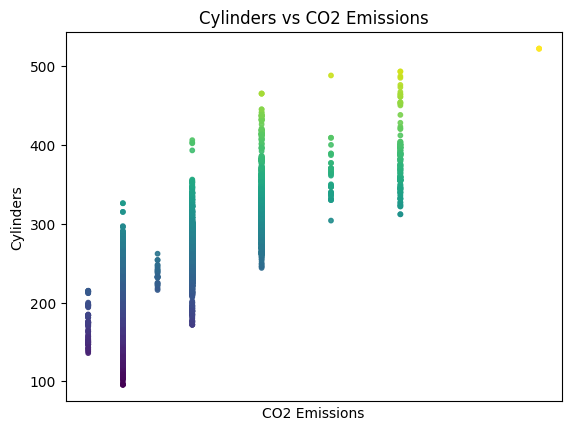

In [4]:
for feature in data_x.columns:
    plt.scatter(data_x[feature], data_y, s=10, c=data_y, cmap="viridis", alpha=0.9)
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel("CO2 Emissions")
    plt.ylabel(feature)
    plt.xticks([])
    plt.show()

## Training the model and tuning the hyperparameters

The learning rate will be tweaked to find a good middleground among all the hyperparameters. The validation data subset will be used to establish the best pair of hyperparameters for this particular model.

In [5]:
# Make several models using different learning rates and epochs and use the performance metric measures to check how well they perform
learning_rates = [0.00001, 0.0003, 0.0002, 0.0005, 0.0001]
models = [LinearRegression(lr=lr) for lr in learning_rates]

conv_train_x = train_x.values.tolist()
conv_train_y = list(train_y)

# Visualize features of the training data subset
train_x

,Cylinders
5170,4
1779,6
4503,6
4588,4
1818,4
...,...
5191,4
5226,6
5390,6
860,4


In [6]:
# Visualize results of the training data subset
train_y

5170    251
1779    244
4503    270
4588    121
1818    177
       ... 
5191    210
5226    214
5390    242
860     198
7270    279
Name: CO2 Emissions(g/km), Length: 4431, dtype: int64

#### Train each model, run the test with the validation data subset and choose the best performing model

In [ ]:
# Train each model
for model in models:
    model.fit(conv_train_x, conv_train_y)

In [9]:
# Run the tests for each model
def root_mean_squared(real_values, predicted_values) -> float:
    ms = 0
    for i in range(len(real_values)):
        ms += pow(real_values[i] - predicted_values[i], 2)
    
    ms /= len(real_values)
    return pow(ms, 0.5)

conv_validation_x = validation_x.values.tolist()
conv_validation_y = list(validation_y)

rms_scores = [0] * len(models)
for i, model in enumerate(models):
    print(f" | Running validation tests for model #{i+1}")
    rms_scores[i] = root_mean_squared(conv_validation_y, model.predict(conv_validation_x))
    print(f" | Model #{i+1} scored an RMS value of: {round(rms_scores[i], 2)}")

best_model_index = 0
for i in range(len(models)):
    if rms_scores[i] > rms_scores[best_model_index]:
        best_model_index = i

best_model = models[best_model_index]
print(f"\n | Model {best_model_index + 1} with a learning rate of {learning_rates[best_model_index]} has the best score.")

 | Running validation tests for model #1
 | Model #1 scored an RMS value of: 131.29
 | Running validation tests for model #2
 | Model #2 scored an RMS value of: 42.22
 | Running validation tests for model #3
 | Model #3 scored an RMS value of: 42.57
 | Running validation tests for model #4
 | Model #4 scored an RMS value of: 41.55
 | Running validation tests for model #5
 | Model #5 scored an RMS value of: 42.93

 | Model 1 with a learning rate of 1e-05 has the best score.


[ 68.07435389  70.89502603  73.71569816  76.5363703   79.35704243
  82.17771457  84.9983867   87.81905883  90.63973097  93.4604031
  96.28107524  99.10174737 101.92241951 104.74309164 107.56376378
 110.38443591 113.20510805 116.02578018 118.84645232 121.66712445
 124.48779659 127.30846872 130.12914086 132.94981299 135.77048513
 138.59115726 141.4118294  144.23250153 147.05317367 149.8738458
 152.69451794 155.51519007 158.33586221 161.15653434 163.97720648
 166.79787861 169.61855075 172.43922288 175.25989502 178.08056715
 180.90123929 183.72191142 186.54258356 189.36325569 192.18392783
 195.00459996 197.8252721  200.64594423 203.46661636 206.2872885
 209.10796063 211.92863277 214.7493049  217.56997704 220.39064917
 223.21132131 226.03199344 228.85266558 231.67333771 234.49400985
 237.31468198 240.13535412 242.95602625 245.77669839 248.59737052
 251.41804266 254.23871479 257.05938693 259.88005906 262.7007312
 265.52140333 268.34207547 271.1627476  273.98341974 276.80409187
 279.62476401 

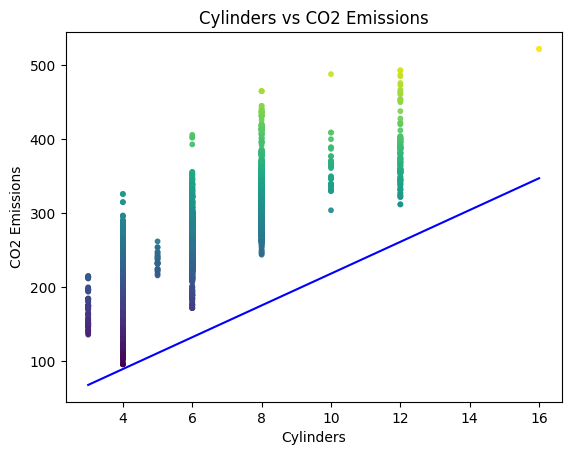

In [ ]:
# plot the points with the regression line

for i, feature in enumerate(data_x.columns):
    plt.scatter(data_x[feature], data_y, s=10, c=data_y, cmap="viridis", alpha=0.9)
    
    line_x = linspace(min(data_x[feature]), max(data_x[feature]), 100)
    line_y = [[0] * len(data_x.columns) for _ in range(len(line_x))]
    for j, data_point in enumerate(line_y):
        data_point[i] = line_x[j]

    line_y = best_model.predict(line_y)
    print(line_y)
    plt.plot(line_x, line_y, color="blue")
    plt.title(f'{feature} vs CO2 Emissions')
    plt.xlabel(feature)
    plt.ylabel("CO2 Emissions")
    plt.show()

# Testing the Model

The testing data subset will be used along with the following performance metrics to evaluate the final version of the model:


### Defining functions for calculating the performance metrics